In [ ]:
from sklearn import datasets #import datasets from sklearn library
import pandas as pd #import pandas under alias pd
data = datasets.load_iris() #load Iris dataset in a variable named data


In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names) #create a dataframe df with features as column name
print(df.head()) #print top 5 rows of the dataframe

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
print(df.info()) #print column name, datatypes and not null value counts for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [ ]:
print(df.describe()) #print statistical summary of the columns

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
print(df.isnull().sum()) #Print the sum of all null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
print(df.isna().sum()) #Print the sum of all NaN values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


**EDA**

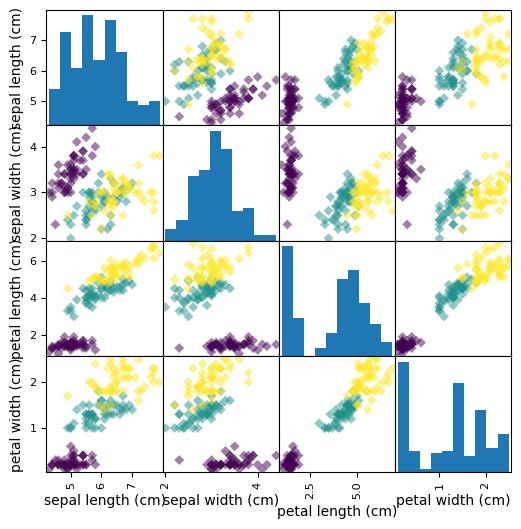

In [ ]:
import matplotlib.pyplot as plt
_ = pd.plotting.scatter_matrix(df, c = data.target, figsize = [6, 6], s = 25, marker = 'D')
plt.show()

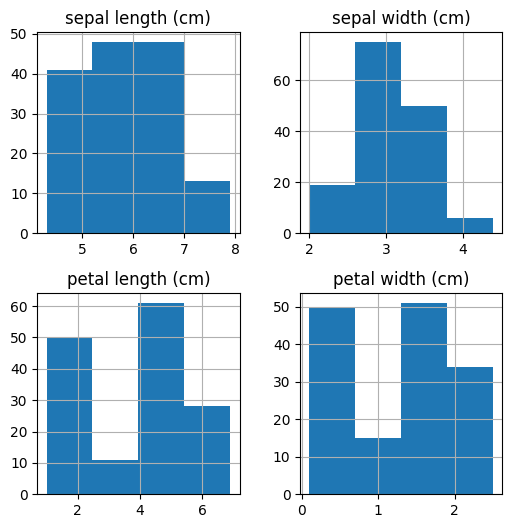

In [ ]:
_ = df.hist(bins = 4, figsize = (6, 6))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
seed = 22 #set seed value for reproducibility
x_data = data.data #Assign input features in x_data
y_data = data.target #Assign target/dependent variable values in y_data
#Now, split the x and y data into train and test dataset.
# Use stratify = y to have the same proportion of the classes in the training sample as the input dataset
(x_train, x_test, y_train, y_test) = train_test_split(\
x_data, y_data, random_state = seed, stratify = y_data, test_size = 0.30)

#Instantiate decision tree classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth = 2, \
min_samples_leaf = 0.10, random_state = seed)
dt.fit(x_train, y_train) #Train the model
y_pred = dt.predict(x_test) #Predict the values on test data

**EVALUATE**



In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is {0}'.format(accuracy_score(y_test, y_pred)))


Accuracy of the model is 0.9333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred), \
            index = ['Actual setosa', 'Actual versicolor', 'Actual virginica'], \
            columns = ['Pred setosa', 'Pred versicolor', 'Pred virginica']))


                   Pred setosa  Pred versicolor  Pred virginica
Actual setosa               15                0               0
Actual versicolor            0               14               1
Actual virginica             0                2              13


In [ ]:
from sklearn.metrics import classification_report
print('Classification report is {0}'.format(classification_report(y_test, y_pred)))


Classification report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

